In [15]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
faang = ['FB','AMZN','AAPL','NFLX','GOOG']
labels = faang

In [17]:
def read_and_merge(wkns:[]=None,names:[]=None,start=None,stop=None):
    import yfinance as yf
    df_list = []
    for wkn in wkns:
        stock = yf.Ticker(wkn)
        df = stock.history(start=start, end=stop)
        df_list.append(df)
    stocks = pd.concat(df_list, axis=1,keys=names)
    stocks.columns.names = ['Stock Ticker','Stock Info']
    return stocks

def returns(stocks_df=None,labels:[]=None):
    returns = pd.DataFrame()
    for label in  labels:
        returns[label+' Return'] = stocks_df[label]['Close'].pct_change()

    return returns

def plot_stocks(df_stock:[]=None,names:[]= None):
    sns.set_style('whitegrid')
    import cufflinks as cf
    cf.go_offline()

    for name in names:
        df_stock[name]['Close'].plot(figsize=(16,10),label=name)


    df_stock.xs(key='Close',axis=1,level='Stock Info').iplot()
    plt.grid(True)
    plt.legend()
    plt.show()
    sns.heatmap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
    sns.clustermap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [18]:
df = read_and_merge(faang,labels,start="2014-01-01",stop="2021-10-01")
retruns_df = returns(stocks_df=df,labels=labels)

df

Stock Ticker          FB                                                \
Stock Info          Open        High         Low       Close    Volume   
Date                                                                     
2013-12-31     54.119999   54.860001   53.910000   54.650002  43076200   
2014-01-02     54.830002   55.220001   54.189999   54.709999  43195500   
2014-01-03     55.020000   55.650002   54.529999   54.560001  38246200   
2014-01-06     54.419998   57.259998   54.049999   57.200001  68852600   
2014-01-07     57.700001   58.549999   57.220001   57.919998  77207400   
...                  ...         ...         ...         ...       ...   
2021-09-24    343.239990  354.350006  342.369995  352.959991  18801900   
2021-09-27    349.809998  355.149994  347.079987  353.579987  15205800   
2021-09-28    347.970001  349.600006  338.920013  340.649994  21710300   
2021-09-29    343.149994  345.230011  338.880005  339.609985  14452200   
2021-09-30    340.450012  342.799988  338.149994  339.390015  16547100   

Stock Ticker                                AMZN                            \
Stock Info   Dividends Stock Splits         Open         High          Low   
Date                                                                         
2013-12-31           0            0   394.579987   398.829987   393.799988   
2014-01-02           0            0   398.799988   399.359985   394.019989   
2014-01-03           0            0   398.290009   402.709991   396.220001   
2014-01-06           0            0   395.850006   397.000000   388.420013   
2014-01-07           0            0   395.040009   398.470001   394.290009   
...                ...          ...          ...          ...          ...   
2021-09-24           0            0  3402.010010  3429.260010  3393.399902   
2021-09-27           0            0  3371.500000  3415.570068  3339.610107   
2021-09-28           0            0  3357.709961  3369.189941  3290.100098   
2021-09-29           0            0  3322.110107  3351.300049  3297.870117   
2021-09-30           0            0  3316.000000  3327.850098  3273.989990   

Stock Ticker  ...      NFLX                                GOOG               \
Stock Info    ...    Volume Dividends Stock Splits         Open         High   
Date          ...                                                              
2013-12-31    ...  10516800         0          0.0   554.043335   558.406982   
2014-01-02    ...  12325600         0          0.0   555.647278   556.788025   
2014-01-03    ...  10817100         0          0.0   555.418152   556.379578   
2014-01-06    ...  15501500         0          0.0   554.426880   557.340942   
2014-01-07    ...  36167600         0          0.0   560.399475   567.717041   
...           ...       ...       ...          ...          ...          ...   
2021-09-24    ...   2126200         0          0.0  2818.919922  2858.070068   
2021-09-27    ...   2504700         0          0.0  2831.709961  2850.000000   
2021-09-28    ...   4431100         0          0.0  2781.770020  2792.129883   
2021-09-29    ...   6221000         0          0.0  2742.194092  2747.969971   
2021-09-30    ...   6612600         0          0.0  2686.500000  2711.800049   

Stock Ticker                                                            
Stock Info            Low        Close   Volume Dividends Stock Splits  
Date                                                                    
2013-12-31     551.064453   558.262512  2725979         0          0.0  
2014-01-02     552.060730   554.481689  3656454         0          0.0  
2014-01-03     550.401978   550.436829  3345894         0          0.0  
2014-01-06     551.154114   556.573853  3551864         0          0.0  
2014-01-07     558.486633   567.303589  5124336         0          0.0  
...                   ...          ...      ...       ...          ...  
2021-09-24    2817.010010  2852.659912   747500         0          0.0  
2021-09-27    2810.

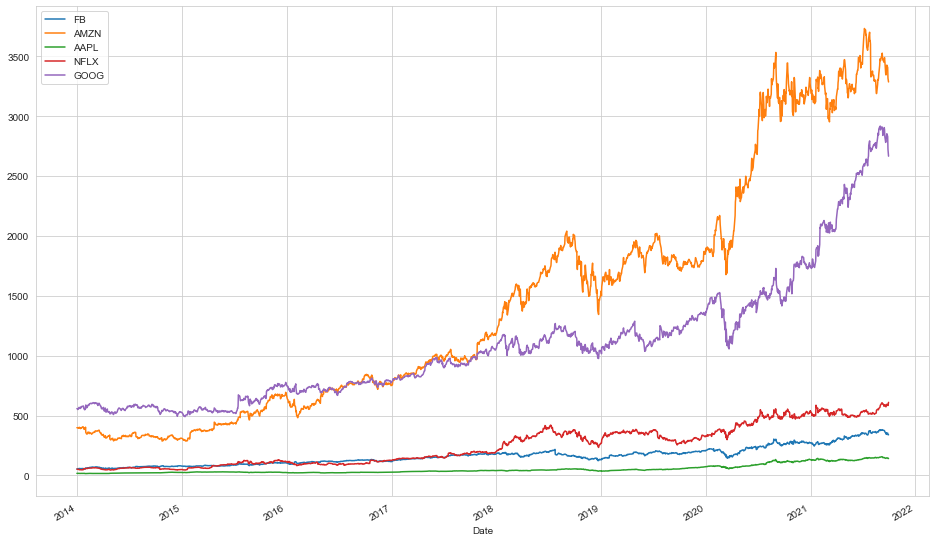

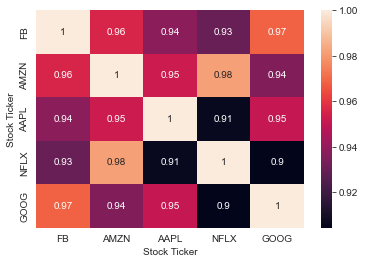

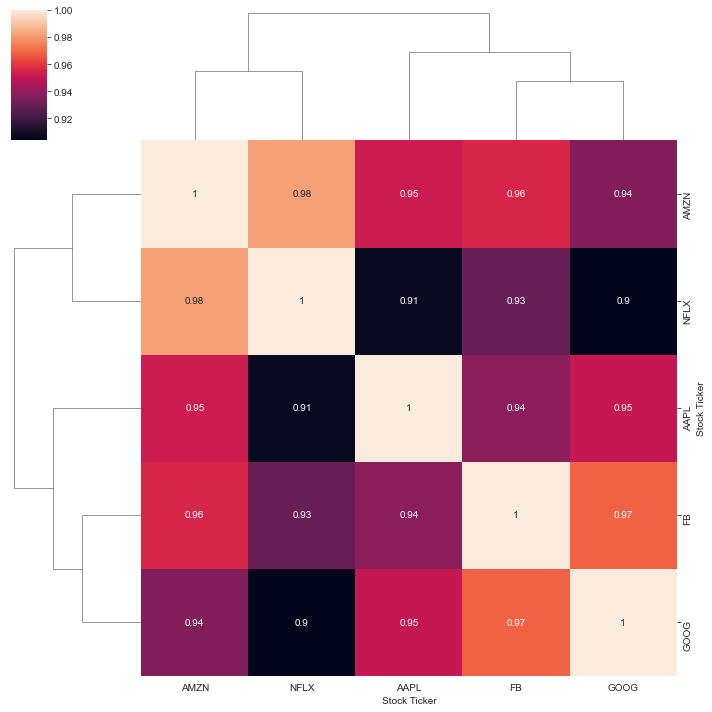

In [19]:
plot_stocks(df_stock=df,names=labels)

In [20]:

#futures = ['GC=F','CL=F','ALI=F']
#labels_future = ['Gold Future','ÖL(Brent) Future','Aluminium Future']

futures = ['KE=F','ZO=F','ZC=F']
labels_future = ['Weizen Future','Hafer Future','Korn Future']

df_futures = read_and_merge(futures,labels_future,start="2014-01-01",stop="2021-10-01")
retruns_df = returns(stocks_df=df_futures,labels=labels_future)

df_futures

Stock Ticker Weizen Future                                           \
Stock Info            Open    High     Low   Close Volume Dividends   
Date                                                                  
2013-12-31          635.75  643.00  632.75  640.50   8420         0   
2014-01-02          638.50  639.75  630.25  631.25   8107         0   
2014-01-03          631.25  644.00  630.50  642.50  13022         0   
2014-01-06          644.50  650.75  643.00  644.00   9500         0   
2014-01-07          645.25  650.50  641.50  645.25  10599         0   
...                    ...     ...     ...     ...    ...       ...   
2021-09-24          720.00  723.75  713.25  719.75  19472         0   
2021-09-27          717.50  724.50  717.50  720.75  17030         0   
2021-09-28          719.25  725.50  703.00  705.00  27400         0   
2021-09-29          707.50  715.25  707.50  711.75  18733         0   
2021-09-30          711.75  737.75  703.50  731.75  36873         0   

Stock Ticker              Hafer Future                  ...                   \
Stock Info   Stock Splits         Open    High     Low  ... Volume Dividends   
Date                                                    ...                    
2013-12-31              0       353.00  356.75  352.75  ...  133.0       0.0   
2014-01-02              0       357.00  357.00  350.00  ...  302.0       0.0   
2014-01-03              0       350.50  352.00  340.75  ...  425.0       0.0   
2014-01-06              0       344.25  352.50  344.00  ...  756.0       0.0   
2014-01-07              0       351.00  364.50  351.00  ...  935.0       0.0   
...                   ...          ...     ...     ...  ...    ...       ...   
2021-09-24              0       581.50  581.50  565.75  ...  381.0       0.0   
2021-09-27              0       574.75  587.75  574.50  ...  356.0       0.0   
2021-09-28              0       586.00  594.50  579.00  ...  364.0       0.0   
2021-09-29              0       583.00  590.75  581.00  ...  329.0       0.0   
2021-09-30              0       584.25  587.25  581.50  ...  289.0       0.0   

Stock Ticker              Korn Future                                    \
Stock Info   Stock Splits        Open    High     Low   Close    Volume   
Date                                                                      
2013-12-31            0.0      423.50  423.50  421.25  422.00   77092.0   
2014-01-02            0.0      422.00  427.25  418.50  420.50  136284.0   
2014-01-03            0.0      420.50  424.00  417.00  423.50  110192.0   
2014-01-06            0.0      423.50  428.00  423.50  427.75   96635.0   
2014-01-07            0.0      427.00  430.00  425.25  426.00  124441.0   
...                   ...         ...     ...     ...     ...       ...   
2021-09-24            0.0      528.50  528.75  524.00  526.75   93098.0   
2021-09-27            0.0      524.75  540.00  524.00  539.50  144946.0   
2021-09-28            0.0      538.75  541.75  532.00  532.50  125830.0   
2021-09-29            0.0      533.50  541.00  533.50  539.00  107220.0   
2021-09-30            0.0      539.00  548.50  527.25  536.75  222135.0   

Stock Ticker                         
Stock Info   Dividends Stock Splits  
Date                                 
2013-12-31         0.0          0.0  
2014-01-02         0.0          0.0  
2014-01-03         0.0          0.0  
2014-01-06         0.0          0.0  
2014-01-07         0.0          0.0  
...                ...          ...  
2021-09-24         0.0          0.0  
2021-09-27         0.0          0.0  
2021-09-28         0.0          0.0  
2021-09-29         0.0          0.0  
2021-09-30         0.0          0.0  

[1937 rows x 21 columns]

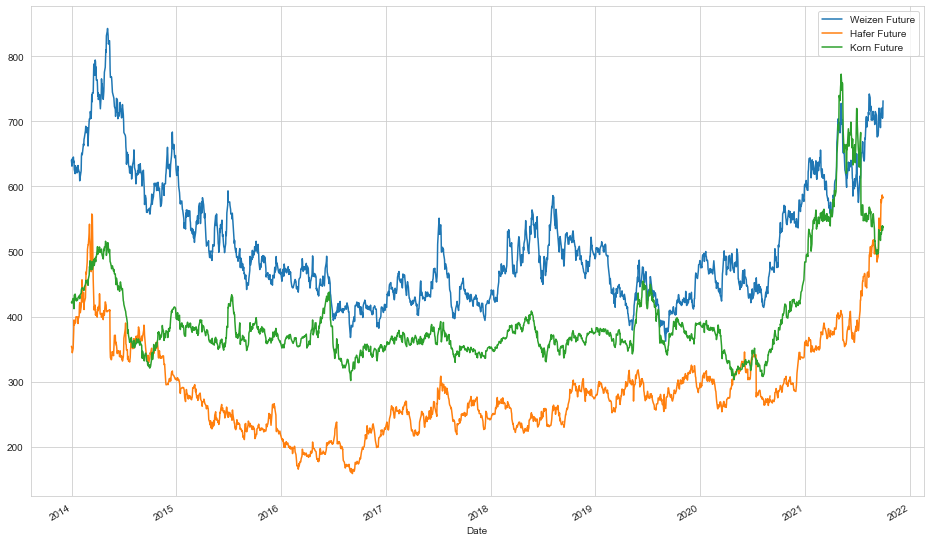

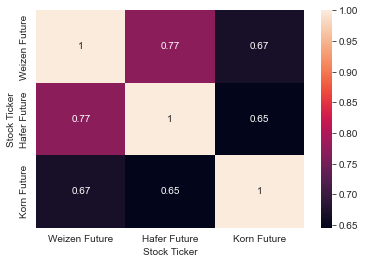

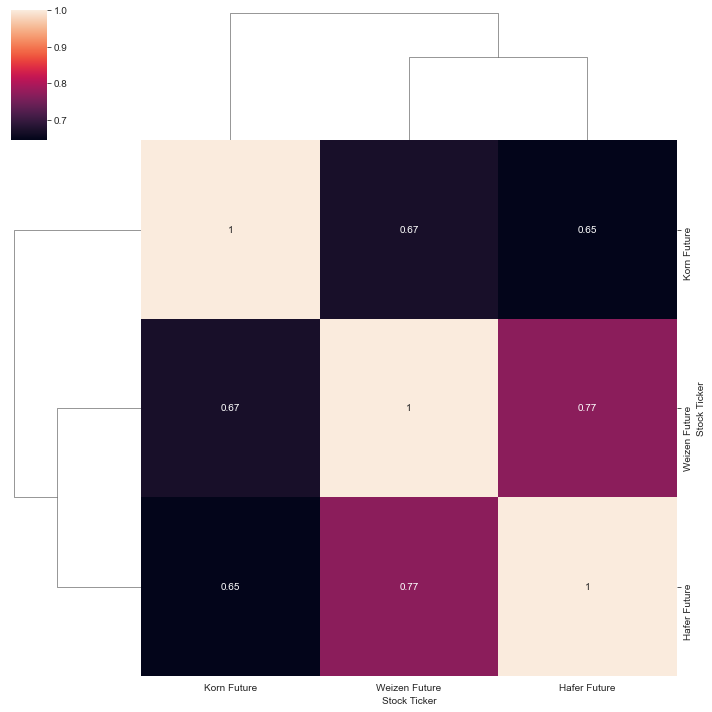

In [21]:
plot_stocks(df_stock=df_futures,names=labels_future)